In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [2]:
df = df[df.Profession=="Student"]

In [3]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [4]:
df.corr(numeric_only=True)

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
id,1.000000,0.004032,0.005181,0.001262,-0.012021,0.007861,0.001933,-0.004189,0.001025
Age,0.004032,1.000000,-0.075871,0.002018,0.005167,0.009131,-0.000428,-0.032775,-0.226738
Academic Pressure,0.005181,-0.075871,1.000000,-0.022236,-0.022325,-0.110903,-0.024949,0.096291,0.474805
Work Pressure,0.001262,0.002018,-0.022236,1.000000,-0.050919,-0.021154,0.770652,-0.005474,-0.003345
CGPA,-0.012021,0.005167,-0.022325,-0.050919,1.000000,-0.044227,-0.053656,0.002613,0.022164
Study Satisfaction,0.007861,0.009131,-0.110903,-0.021154,-0.044227,1.000000,-0.021915,-0.036510,-0.168132
Job Satisfaction,0.001933,-0.000428,-0.024949,0.770652,-0.053656,-0.021915,1.000000,-0.005230,-0.003472
Work/Study Hours,-0.004189,-0.032775,0.096291,-0.005474,0.002613,-0.036510,-0.005230,1.000000,0.209024
Depression,0.001025,-0.226738,0.474805,-0.003345,0.022164,-0.168132,-0.003472,0.209024,1.000000


In [5]:
df.drop(columns=["id"],inplace=True)

In [6]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [7]:
df.dtypes

Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [8]:
df["Sleep Duration"].dtype

dtype('O')

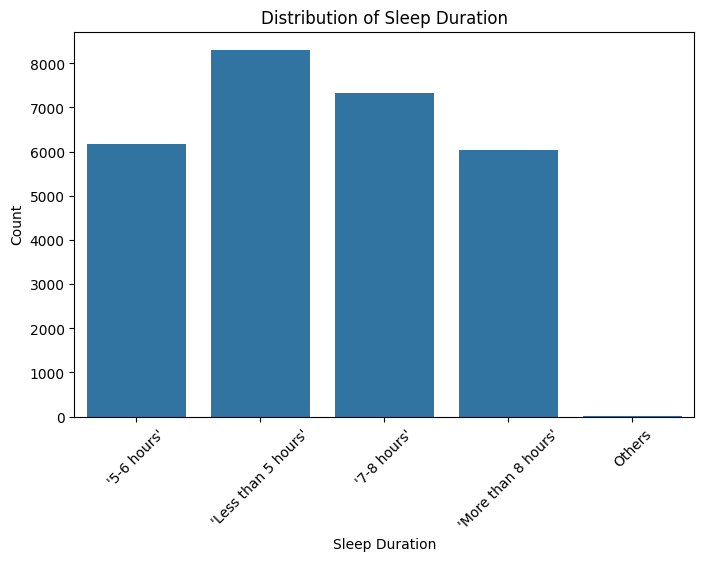

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Sleep Duration"])
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep Duration")
plt.ylabel("Count")
plt.show()


In [10]:
d=df.groupby(["Sleep Duration","Depression"])["Depression"].count()
d
# d = pd.DataFrame(d,columns=["Index","count"])
# d

Sleep Duration       Depression
'5-6 hours'          0             2664
                     1             3513
'7-8 hours'          0             2975
                     1             4362
'Less than 5 hours'  0             2949
                     1             5354
'More than 8 hours'  0             2965
                     1             3070
Others               0                9
                     1                9
Name: Depression, dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Academic Pressure'}>,
        <Axes: title={'center': 'Work Pressure'}>],
       [<Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Study Satisfaction'}>,
        <Axes: title={'center': 'Job Satisfaction'}>],
       [<Axes: title={'center': 'Work/Study Hours'}>,
        <Axes: title={'center': 'Depression'}>, <Axes: >]], dtype=object)

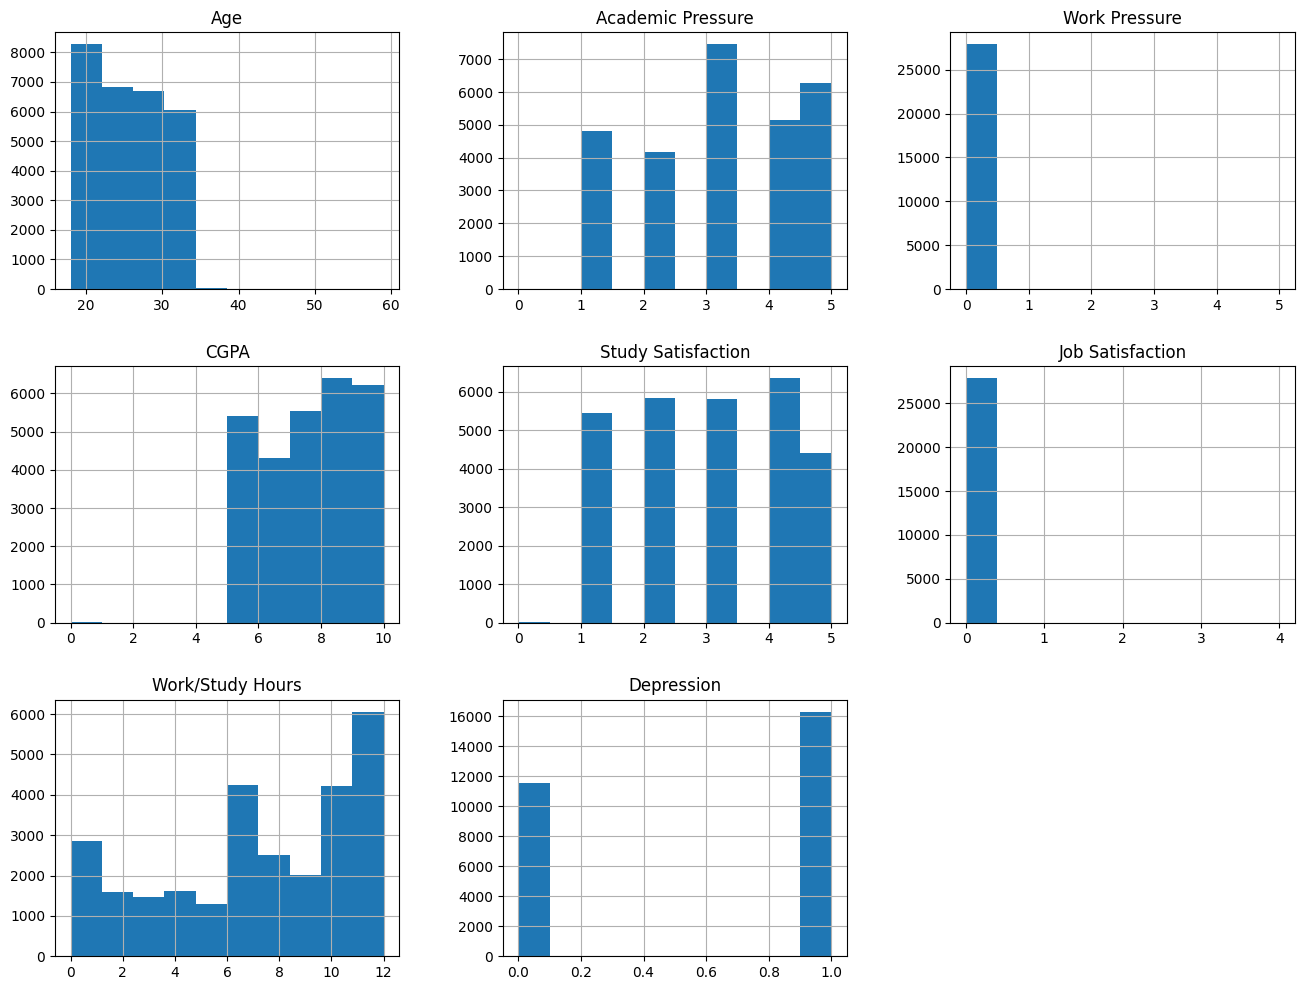

In [11]:
df.hist(figsize=(16,12))

In [12]:
df["Job Satisfaction"].value_counts()

Job Satisfaction
0.0    27862
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64

In [13]:
df.Profession.value_counts()

Profession
Student    27870
Name: count, dtype: int64

In [14]:
df.drop(columns=["Job Satisfaction","Work Pressure"],inplace=True)

In [15]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [16]:
df.City.unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', "'Less Delhi'",
       'City', '3.0', "'Less than 5 Kalyan'", 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

In [17]:
df.reset_index(drop=True)

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,Female,27.0,Surat,Student,5.0,5.75,5.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27866,Male,27.0,Ludhiana,Student,2.0,9.40,3.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27867,Male,31.0,Faridabad,Student,3.0,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27868,Female,18.0,Ludhiana,Student,5.0,6.88,2.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [21]:
df.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Suicidal_thoughts', 'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
What is the relationship between academic pressure and depression levels?

Does CGPA correlate with depression or suicidal thoughts?

How do sleep duration and dietary habits impact mental health?

Are students with financial stress more likely to experience depression?

Do students with a family history of mental illness have higher depression rates?

Is there a link between work/study hours and mental health conditions?

How do different professions or degrees affect students' mental well-being?

In [20]:
df.rename(columns={"Have you ever had suicidal thoughts ?":"Suicidal_thoughts"},inplace=True)

In [22]:
df.corr(numeric_only=True)

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Depression
Age,1.000000,-0.075871,0.005167,0.009131,-0.032775,-0.226738
Academic Pressure,-0.075871,1.000000,-0.022325,-0.110903,0.096291,0.474805
CGPA,0.005167,-0.022325,1.000000,-0.044227,0.002613,0.022164
Study Satisfaction,0.009131,-0.110903,-0.044227,1.000000,-0.036510,-0.168132
Work/Study Hours,-0.032775,0.096291,0.002613,-0.036510,1.000000,0.209024
Depression,-0.226738,0.474805,0.022164,-0.168132,0.209024,1.000000


In [23]:
df.describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Depression
count,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000
mean,25.821134,3.140617,7.656028,2.943559,7.157948,0.585145
std,4.906574,1.381640,1.470835,1.361209,3.707180,0.492706
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,6.290000,2.000000,4.000000,0.000000
50%,25.000000,3.000000,7.770000,3.000000,8.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,10.000000,1.000000
max,59.000000,5.000000,10.000000,5.000000,12.000000,1.000000


In [25]:
df.Age.min()
# df.Age.max()

np.float64(18.0)

<Axes: ylabel='Age'>

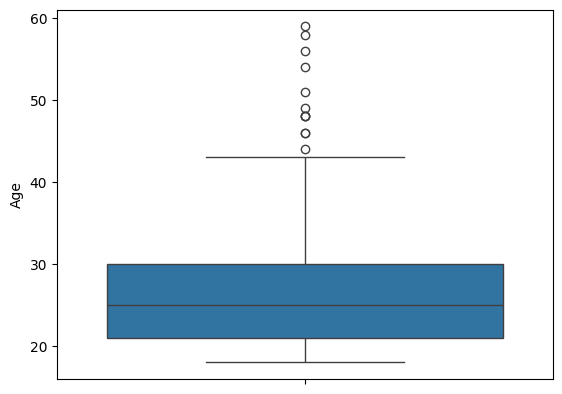

In [26]:
sns.boxplot(df.Age)

In [27]:
Q1 = np.percentile(df.Age,25)
Q3 = np.percentile(df.Age,75)
IQR = Q3-Q1
lowerbound=Q1-1.5*IQR
upperbound =Q3+1.5*IQR
print(lowerbound)
print(upperbound)

7.5
43.5


In [32]:
new_df = df[df.Age<44]
new_df=new_df.reset_index(drop=True)
# new_df

In [34]:
new_df.head()

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal_thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [67]:
# new=new_df.groupby(["Depression"])["Depression"].count()
new=df.Depression.value_counts()
# new = pd.DataFrame(new)
new

Depression
1    16308
0    11562
Name: count, dtype: int64

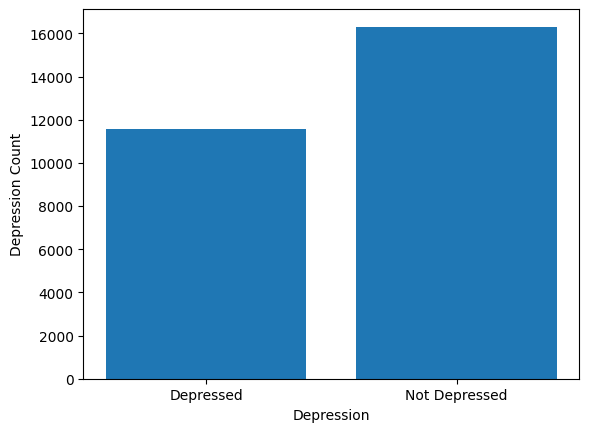

In [70]:
plt.bar(new.index,new.values)
plt.xticks(new.index,["Not Depressed","Depressed"])
plt.xlabel("Depression")
plt.ylabel("Depression Count")
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Academic Pressure'}>],
       [<Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Study Satisfaction'}>],
       [<Axes: title={'center': 'Work/Study Hours'}>,
        <Axes: title={'center': 'Depression'}>]], dtype=object)

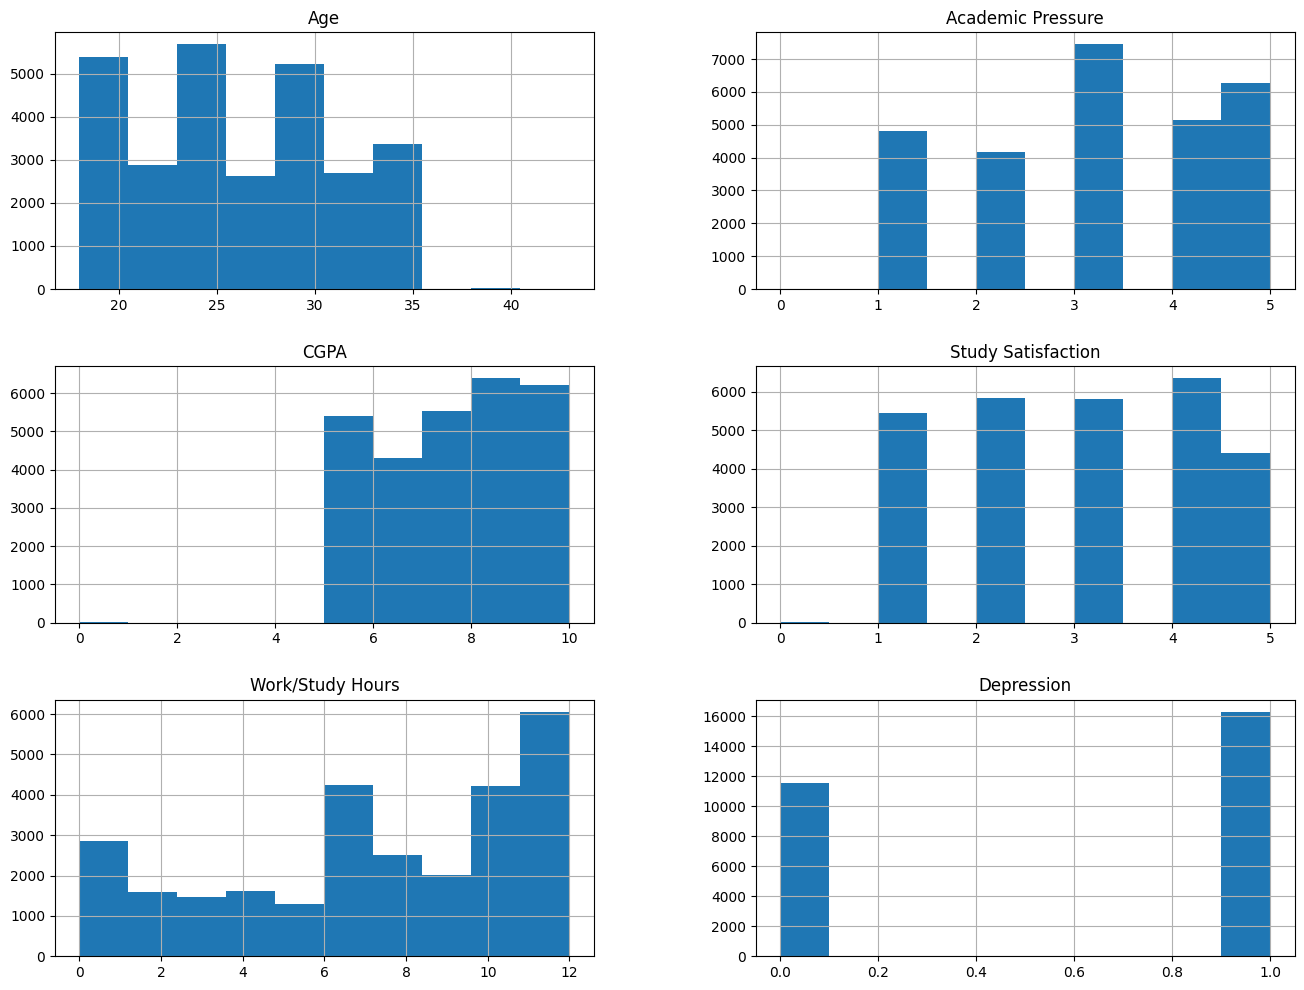

In [74]:
new_df.hist(figsize=(16,12))

In [88]:
no_dep = new_df[new_df.Depression==0]
yes_dep = new_df[new_df.Depression==1]

l_no=no_dep.Degree.value_counts().to_list()
l_yes=yes_dep.Degree.value_counts().to_list()
print(l_no)
print(l_yes)
degree_list=list(new_df.Degree.value_counts().to_dict().keys())
# degree_list

[1775, 845, 653, 614, 607, 511, 501, 497, 485, 416, 406, 382, 362, 344, 314, 291, 289, 279, 278, 272, 268, 259, 254, 234, 223, 92, 87, 14]
[4302, 1018, 870, 853, 818, 675, 655, 556, 521, 521, 506, 427, 415, 406, 403, 389, 356, 333, 321, 313, 303, 296, 288, 285, 258, 99, 98, 21]
['BSc', 'BA', 'M.Tech', 'PhD', "'Class 12'", 'BE', 'B.Ed', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Pharm', 'BCA', 'MD', 'MSc', 'B.Com', 'M.Com', 'B.Arch', 'B.Tech', 'BBA', 'ME', 'LLB', 'LLM', 'M.Ed', 'MBBS', 'MBA', 'MHM', 'Others']


In [91]:
degree_list=list(new_df.Degree.value_counts().to_dict().keys())
# degree_list

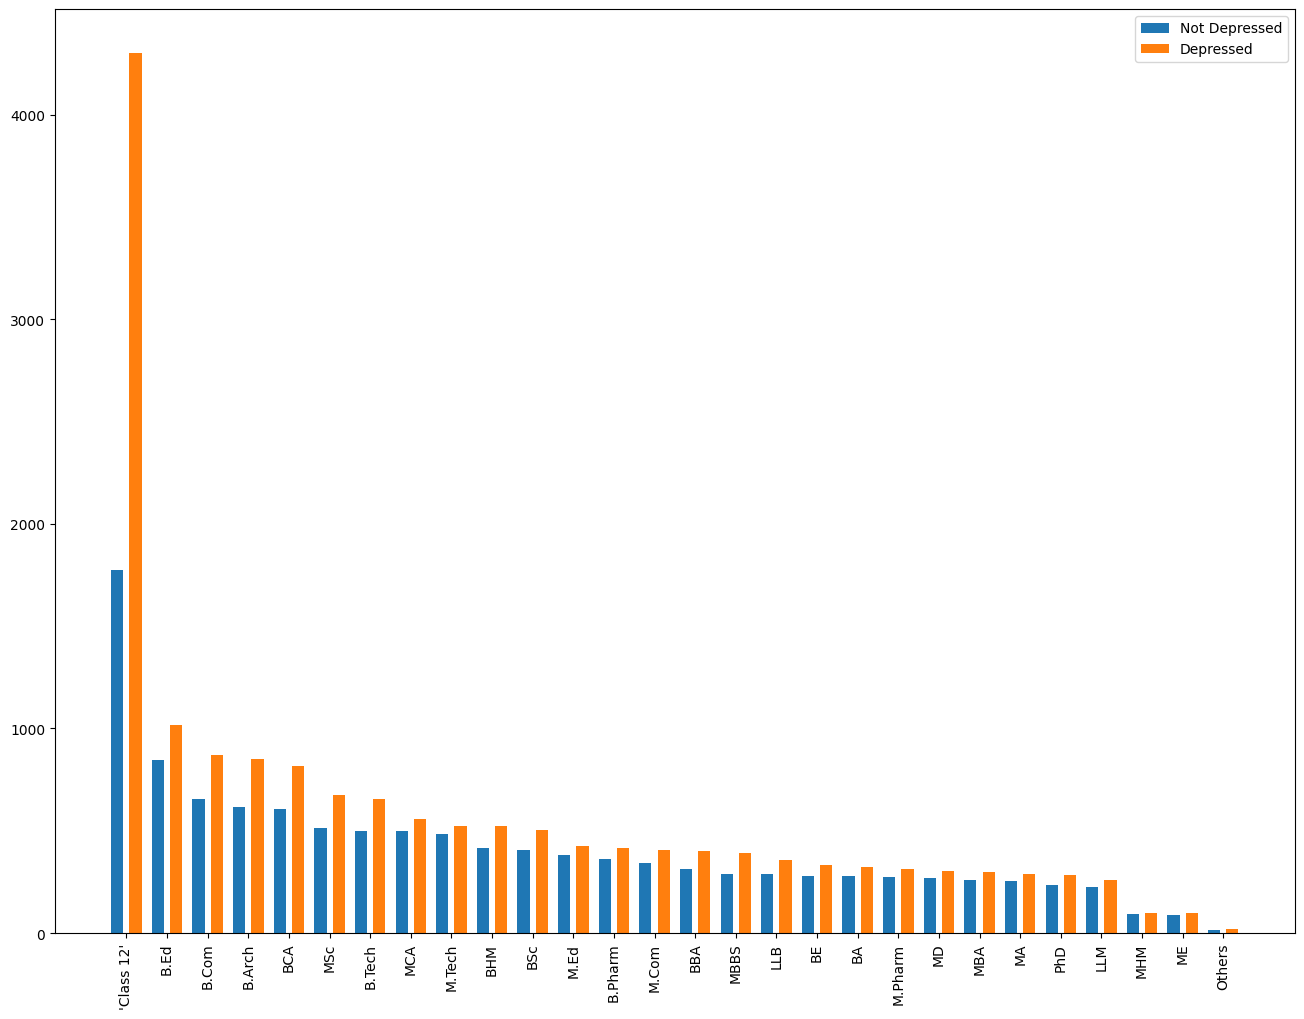

In [99]:
x = np.arange(len(l_no))
plt.figure(figsize=(16,12))
plt.bar(x+0.00,l_no,width=0.3,label="Not Depressed")
plt.bar(x+0.30,l_yes,width=0.3,label="Depressed",align ="edge")
plt.xticks(x+0.225,degree_list,rotation=90)
plt.legend()
plt.show()

In [100]:
new_df.groupby("CGPA")["Depression"].count()

CGPA
0.00       9
5.03      17
5.06      15
5.08      95
5.09      20
        ... 
9.95     133
9.96     425
9.97     139
9.98      59
10.00     58
Name: Depression, Length: 331, dtype: int64

In [103]:
temp =new_df[new_df.CGPA<=0]
temp

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal_thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4354,Male,38.0,Chennai,Student,0.0,0.0,0.0,'5-6 hours',Healthy,'Class 12',No,2.0,3.0,No,0
10390,Male,28.0,Vadodara,Student,3.0,0.0,4.0,'Less than 5 hours',Healthy,BBA,No,12.0,2.0,No,0
11472,Female,32.0,Vadodara,Student,5.0,0.0,0.0,'Less than 5 hours',Unhealthy,'Class 12',Yes,11.0,5.0,No,1
13888,Female,20.0,Ahmedabad,Student,0.0,0.0,0.0,'Less than 5 hours',Moderate,'Class 12',Yes,12.0,3.0,Yes,1
14832,Male,21.0,Lucknow,Student,0.0,0.0,0.0,'7-8 hours',Moderate,'Class 12',Yes,3.0,3.0,Yes,0
20881,Male,18.0,Ahmedabad,Student,0.0,0.0,0.0,'Less than 5 hours',Moderate,'Class 12',Yes,9.0,5.0,No,1
21773,Male,34.0,Pune,Student,1.0,0.0,5.0,'Less than 5 hours',Unhealthy,M.Ed,Yes,10.0,3.0,Yes,0
25707,Male,18.0,Rajkot,Student,0.0,0.0,0.0,'7-8 hours',Moderate,'Class 12',Yes,9.0,4.0,No,1
26679,Female,24.0,Meerut,Student,0.0,0.0,0.0,'More than 8 hours',Unhealthy,'Class 12',No,0.0,5.0,No,0


In [107]:
no_dep = new_df[new_df.Depression==0]
yes_dep = new_df[new_df.Depression==1]

l_no=no_dep.Gender.value_counts().to_list()
l_yes=yes_dep.Gender.value_counts().to_list()
print(l_no)
print(l_yes)
Gender_list=list(new_df.Gender.value_counts().to_dict().keys())
print(Gender_list)

[6425, 5127]
[9100, 7206]
['Male', 'Female']


In [106]:
new_df.groupby(["Gender","Depression"])["Depression"].count()x

Gender  Depression
Female  0             5127
        1             7206
Male    0             6425
        1             9100
Name: Depression, dtype: int64

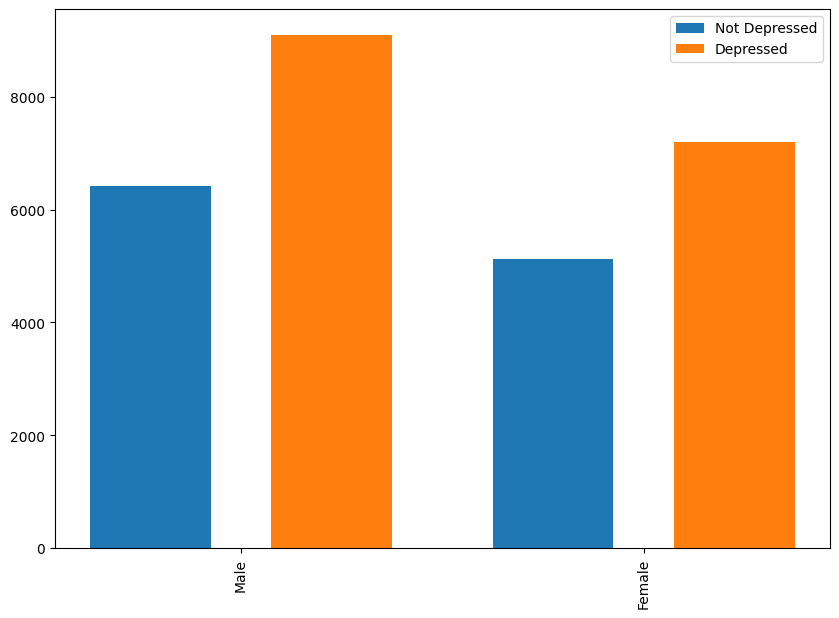

In [110]:
x = np.arange(len(l_no))
plt.figure(figsize=(10,7))
plt.bar(x+0.00,l_no,width=0.3,label="Not Depressed")
plt.bar(x+0.30,l_yes,width=0.3,label="Depressed",align ="edge")
plt.xticks(x+0.225,Gender_list,rotation=90)
plt.legend()
plt.show()

In [119]:
new_df.CGPA.replace({0.:new_df.CGPA.mean()},inplace=True)

C:\Users\H.P\AppData\Local\Temp\ipykernel_40444\3218770279.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df.CGPA.replace({0.:new_df.CGPA.mean()},inplace=True)


In [123]:
CGPAbelow5=new_df[new_df.CGPA<=7]
CGPAabove5=new_df[new_df.CGPA>7]

In [128]:
l_no=CGPAbelow5.Depression.value_counts().to_list()
l_yes=CGPAabove5.Depression.value_counts().to_list()
print(l_no)
print(l_yes)
CGPA_l=["<7",">7"]

[5577, 4138]
[10729, 7414]


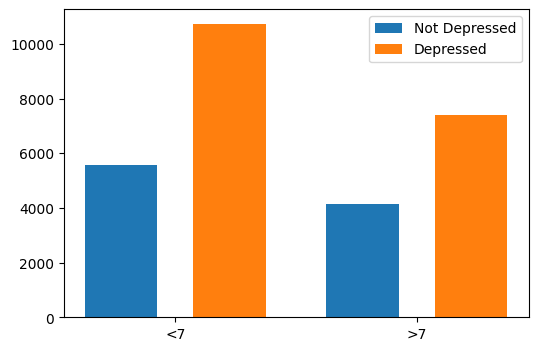

In [133]:
x = np.arange(len(l_no))
plt.figure(figsize=(6,4))
plt.bar(x+0.00,l_no,width=0.3,label="Not Depressed")
plt.bar(x+0.30,l_yes,width=0.3,label="Depressed",align ="edge")
plt.xticks(x+0.225,CGPA_l)
plt.legend()
plt.show()

In [134]:
new_df

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal_thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27853,Female,27.0,Surat,Student,5.0,5.75,5.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27854,Male,27.0,Ludhiana,Student,2.0,9.40,3.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27855,Male,31.0,Faridabad,Student,3.0,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27856,Female,18.0,Ludhiana,Student,5.0,6.88,2.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [141]:
# Dietary Habits
new_df.groupby(["Dietary Habits","Depression"])["Depression"].count()

Dietary Habits  Depression
Healthy         0             4174
                1             3462
Moderate        0             4359
                1             5548
Others          0                4
                1                8
Unhealthy       0             3015
                1             7288
Name: Depression, dtype: int64

In [145]:
not_dep = [4174,4359,3015]
yes_dep=[3462,5548,7288]
Deitary= ["Healthy","Moderate","Unhealthy"]


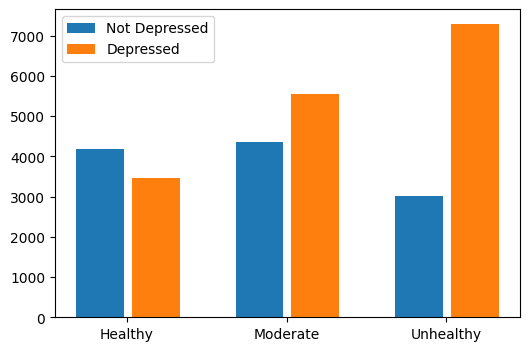

In [149]:
x = np.arange(len(not_dep))
plt.figure(figsize=(6,4))
plt.bar(x+0.00,not_dep,width=0.3,label="Not Depressed")
plt.bar(x+0.20,yes_dep,width=0.3,label="Depressed",align ="edge")
plt.xticks(x+0.17,Deitary)
plt.legend()
plt.show()